In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# 학습용 데이터의 차원
print(X_train.shape, y_train.shape)
# 테스트 데이터의 차원
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# 학습용 데이터: 첫 번째 손글씨 데이터
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
# 테스트 데이터: 1~10행 출력
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


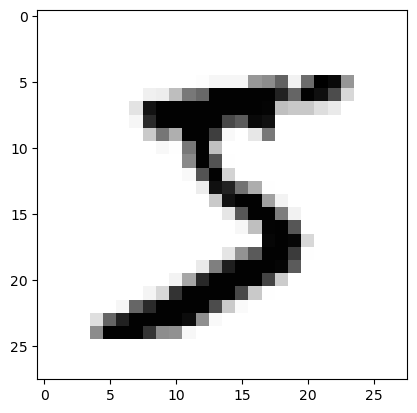

In [7]:
# 학습용 데이터의 그래프 출력: 첫 번째 손글씨 데이터
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [8]:
# 입력 데이터의 차원 변환: 2차원(이미지 수 X 784)
X_train_2 = X_train.reshape(X_train.shape[0], 784)

In [9]:
# 각 열별 널 값의 빈도
nan = pd.DataFrame(X_train_2).isnull().sum()
print(nan)

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


In [10]:
# 널 값이 있는 열 출력
print(nan[nan!=0])

Series([], dtype: int64)


In [11]:
# 각 열별 픽셀의 강도 분석
X_train_2_pd = pd.DataFrame(X_train_2)
X_train_2_pd.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [12]:
# 라벨별 빈도
y_cnt = pd.DataFrame(y_train).value_counts()
print(y_cnt)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


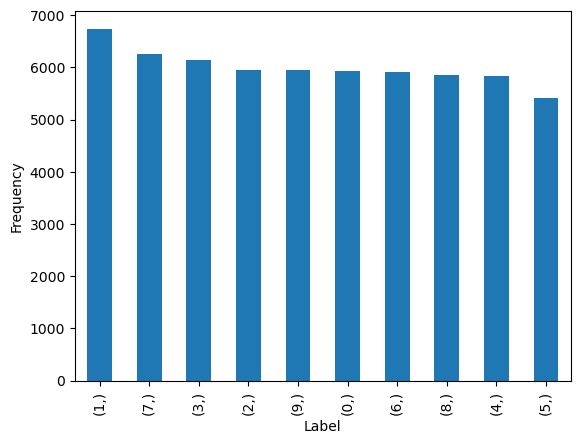

In [13]:
# 라벨별 빈도에 대한 바 차트 출력
y_cnt.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [14]:
# 입력 데이터 정규화
X_train_norm = X_train.astype('float32')/255
X_test_norm = X_test.astype('float32')/255

# 1행 출력
print(X_train_norm[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
# 출력 데이터의 원-힛 인코딩
y_train_class = to_categorical(y_train)
y_test_class = to_categorical(y_test)
# 1~10행 출력
print(y_test_class[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [16]:
# 모형 구조
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0, 5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0, 5))
model.add(Dense(10, activation='softmax'))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 모형 구조 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 모형 구성
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
# 학습
results = model.fit(X_train_norm, y_train_class,
                   validation_data=(X_test_norm, y_test_class),
                   epochs=50, batch_size=128)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 60ms/step - accuracy: 0.8332 - loss: 0.5362 - val_accuracy: 0.9815 - val_loss: 0.0619
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.9822 - loss: 0.0579 - val_accuracy: 0.9884 - val_loss: 0.0382
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9875 - loss: 0.0399 - val_accuracy: 0.9884 - val_loss: 0.0343
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9912 - loss: 0.0279 - val_accuracy: 0.9889 - val_loss: 0.0325
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.9884 - val_loss: 0.0358
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9950 - loss: 0.0173 - val_accuracy: 0.9903 - val_loss: 0.0311
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9961 - loss: 0.0123 - val_accuracy: 0.9900 - val_loss: 0.0324
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9967 - loss: 0.0102 - 

In [20]:
# 학습모형에 저장된 키 (변수)
print(results.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


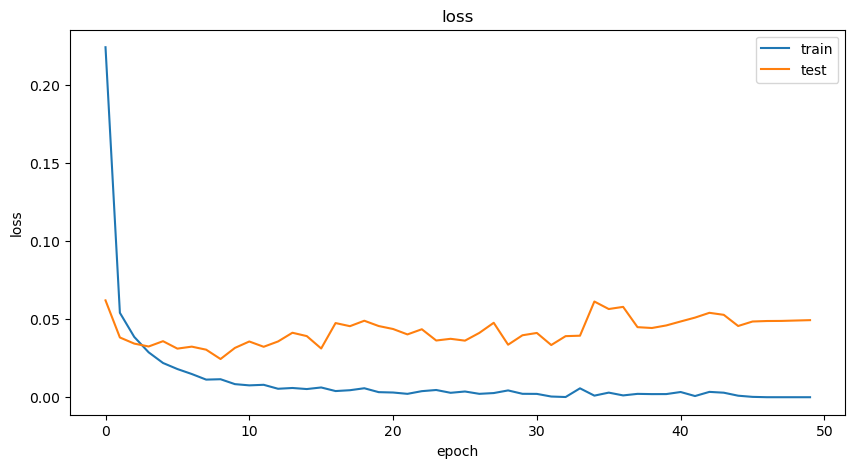

In [21]:
# 학습 수에 따른 loss 변화
plt.figure(figsize=(10,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

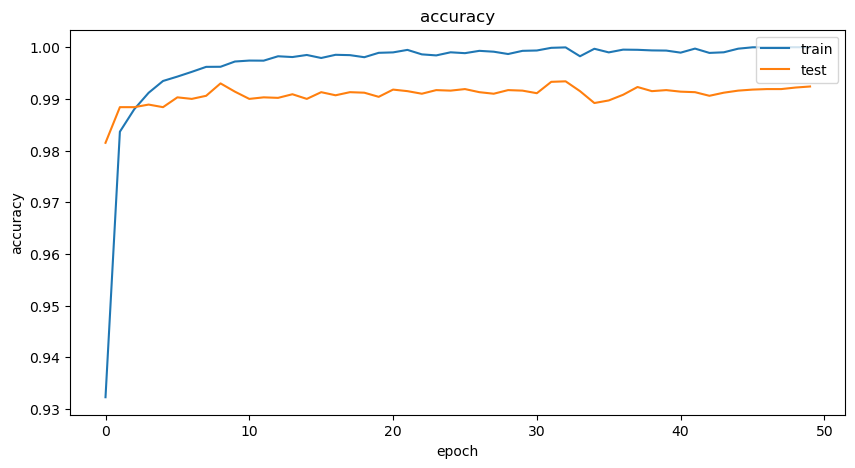

In [22]:
# 학습 수에 따른 정확도 변화
plt.figure(figsize=(10,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [23]:
# 모형 테스트
score = model.evaluate(X_test_norm, y_test_class)
print("Test loss", score[0])
print("Test Accuracy", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9897 - loss: 0.0687
Test loss 0.04929972067475319
Test Accuracy 0.9923999905586243


In [24]:
# 예측[2]
y_pred = model.predict(X_test_norm)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[9.7761552e-21 6.0220072e-17 6.9495463e-20 ... 1.0000000e+00
  2.0754922e-22 4.3623010e-15]
 [1.6662057e-20 3.5705861e-19 1.0000000e+00 ... 9.4620545e-27
  1.0296152e-25 7.8179508e-24]
 [4.7685198e-20 1.0000000e+00 4.4671889e-19 ... 1.4945645e-18
  2.4190897e-17 2.7543176e-20]
 ...
 [4.0180485e-31 5.8426553e-17 5.3762572e-21 ... 2.4828913e-23
  3.5860164e-16 3.0596961e-25]
 [7.8280952e-17 3.2464139e-16 2.0549077e-21 ... 5.4291801e-22
  1.9433212e-11 8.5802758e-18]
 [1.8629495e-17 6.7221362e-17 5.2301770e-16 ... 3.8194087e-30
  1.4276778e-14 4.6086317e-23]]


In [25]:
# 예측 값의 라벨
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class)

[7 2 1 ... 4 5 6]


In [26]:
# 교차표: 실제 값 대비 예측 값
pd.crosstab(y_test, y_pred_class)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1132,0,0,0,1,0,1,0,1
2,1,0,1025,0,1,0,0,5,0,0
3,0,0,0,1006,0,3,0,1,0,0
4,0,0,1,0,975,0,2,0,1,3
5,0,0,1,5,0,882,2,1,0,1
6,3,2,0,0,3,3,946,0,1,0
7,0,2,4,0,1,0,0,1018,1,2
8,3,0,1,1,0,0,0,2,965,2
